<a href="https://colab.research.google.com/github/davyleroy/linear_regression_model/blob/main/Multivariate_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [1]:
#  data manipulation and analysis
#  programmatic plot generation
#  linear regression
#  splitting the dataset
#  evaluation metrics
# Other Models, Descision tree and random Forest

import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Import the unit tests defined for this notebook.

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [2]:
path = "50_Startups.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [3]:
# Print some part of the dataset.
adv.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
adv.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: xlabel='R&D Spend', ylabel='Profit'>

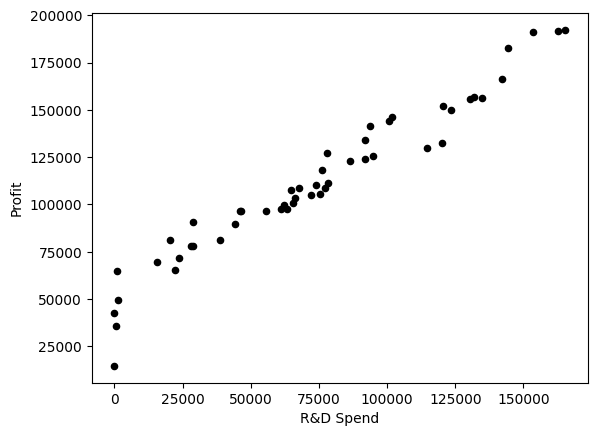

In [6]:
adv.plot(x='R&D Spend', y='Profit', kind='scatter', c='black')

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

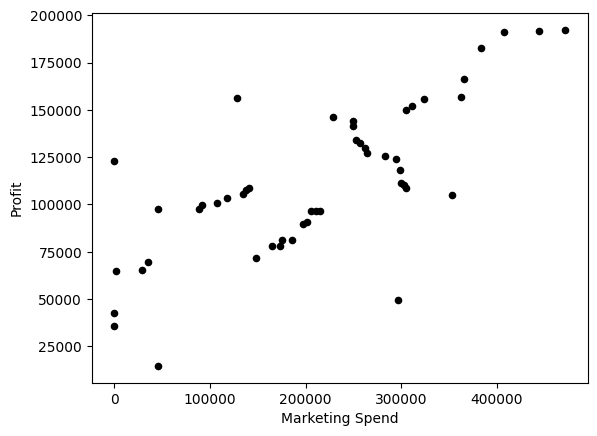

In [7]:
adv.plot(x='Marketing Spend', y='Profit', kind='scatter', c='black')

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [8]:
X = adv.drop(['Profit'], axis="columns")
Y = adv['Profit']

In [9]:
from sklearn.preprocessing import MinMaxScaler
# Replace "New York" with NaN and then fill with a suitable value (e.g., mean)
scaler = MinMaxScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]
X_scaled = scaler.fit_transform(X_numeric)
scaler = MinMaxScaler()



In [10]:
X_scaled

array([[1.        , 0.65174393, 1.        ],
       [0.98335946, 0.76197173, 0.94089337],
       [0.92798459, 0.37957895, 0.8646636 ],
       [0.87313643, 0.51299839, 0.81223513],
       [0.85943772, 0.30532804, 0.77613557],
       [0.797566  , 0.3694479 , 0.76912588],
       [0.81412828, 0.73016111, 0.27071031],
       [0.7880179 , 0.71745725, 0.68649342],
       [0.72901786, 0.74173276, 0.66049977],
       [0.74590551, 0.43692884, 0.64644319],
       [0.61635061, 0.45150637, 0.48573267],
       [0.60884455, 0.30836422, 0.52936195],
       [0.56766982, 0.57883556, 0.52956308],
       [0.55635219, 0.64106561, 0.53555202],
       [0.72539353, 0.8013272 , 0.54370828],
       [0.69261666, 0.54302973, 0.55486446],
       [0.47180821, 0.53527036, 0.56031151],
       [0.57246821, 0.71401273, 0.59894835],
       [0.55488118, 0.47877201, 0.62511553],
       [0.52264964, 0.77823604, 0.        ],
       [0.46116861, 0.47642362, 0.63305328],
       [0.47408436, 0.78021012, 0.63532724],
       [0.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error
Y_pred = model.predict(X_test)
mean_abo_err = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mean_abo_err}")

Mean Absolute Error: 6979.152252370399


In [14]:
mean_error_score = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mean_error_score}")

Mean Squared Error: 80926321.22295156


In [15]:
print(model.score(X_test, Y_test)*100)

90.00653083037321


In [16]:
y_test_example = Y_test.values.flatten()

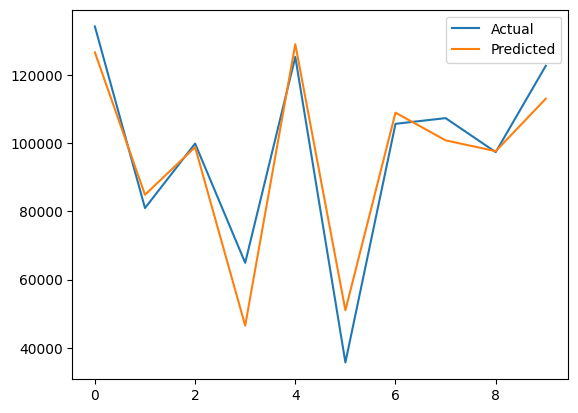

In [17]:
plt.plot(y_test_example, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.legend()
plt.show()

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.

In [18]:
with open('model.pkl', 'wb') as file: #
    pkl.dump(model, file)

In [22]:
#sample prediction
row_index = 4
single_row = X_test[[row_index]]
new_value = model.predict(single_row)
print(single_row)
print("Predicted Value", new_value)
new_data = np.array([[162558, 151375, 383199]])
scaler = MinMaxScaler()
scaler.fit(new_data)
new_data_scaled = scaler.transform(new_data)
another_value = model.predict(new_data_scaled)
print(new_data_scaled)
print("another Value : ", another_value)

[[0.57246821 0.71401273 0.59894835]]
Predicted Value [129128.39734381]
[[0. 0. 0.]]
another Value :  [50588.25440559]


In [1]:
# prompt: installing uvicorn api

!pip install asyncio uvicorn fastapi


In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"Hello": "World"}